In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('NC_listings.csv')
#df.plot(x='experience_district', y='salary', kind='scatter')
#plt.show()

df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [2]:
pd.set_option('display.max_columns', None)
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,38585,https://www.airbnb.com/rooms/38585,20191128073742,2019-11-28,Charming Victorian home - twin beds + breakfast,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,I can lend you a yoga mat or you can go to our...,"You need a car, but UBER and Lyft are availabl...",Safe parking in our driveway. You also have fu...,"I love entertaining, enjoy chatting with guest...",This list is based on previous experiences: * ...,NaN,NaN,https://a0.muscache.com/im/pictures/216165/755...,NaN,165529,https://www.airbnb.com/users/show/165529,Evelyne,2010-07-13,"Asheville, North Carolina, United States","(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/165529/profil...,https://a0.muscache.com/im/users/165529/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Asheville, NC, United States",NaN,28804,NaN,Asheville,NC,28804.0,North Carolina Mountains,"Asheville, NC",US,United States,35.65146,-82.62792,t,House,Private room,2,1.0,1,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",NaN,$55.00,NaN,NaN,$150.00,$0.00,1,$15.00,2,3,2,2,3,3,2.0,3.0,3 days ago,t,24,45,64,64,2019-11-28,137,16,2010-10-28,2019-11-11,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""NORTH CAROLINA"","" BUNCOMBE""}",f,f,moderate,t,t,1,0,1,0,1.24
1,80905,https://www.airbnb.com/rooms/80905,20191128073742,2019-11-28,French Chic Loft,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",there is Apple TV not cable TV (there is no op...,Park your car and walk anywhere and everywhere...,NaN,I am easily accessible and available if you ne...,THE GUEST WHO BOOKS AGREES TO: • Be present at...,NaN,NaN,https://a0.muscache.com/im/pictures/29807425/6...,NaN,427027,https://www.airbnb.com/users/show/427027,Celeste,2011-03-07,"Asheville, North Carolina, United States",Locally-owned and operated Asheville Stay offe...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/e7351.

In [3]:
target = df[['price']]

In [4]:
target.columns

Index(['price'], dtype='object')

In [5]:
target.head()

,price
0,$55.00
1,$765.00
2,$75.00
3,$107.00
4,$71.00


In [6]:
len(target)

2441

In [7]:
##change prices to float values
array = []
for i in range(0,len(target)):
    num = float(df.price.iloc[i].strip('$').replace(',',''))
    array.append(num)
    
print(len(array))

2441


In [8]:
df.price = array
df.price.head()


0     55.0
1    765.0
2     75.0
3    107.0
4     71.0
Name: price, dtype: float64

In [9]:
df.price.tail()

2436     78.0
2437     58.0
2438    175.0
2439    195.0
2440    175.0
Name: price, dtype: float64

In [10]:
df.price.max()

10000.0

In [11]:
df.price.min()

0.0

WHY???

In [12]:
df.property_type.head(20)

0           House
1            Loft
2       Apartment
3      Guesthouse
4           House
5           House
6           House
7           House
8     Guest suite
9        Bungalow
10          Cabin
11      Apartment
12      Apartment
13     Guesthouse
14    Guest suite
15    Guest suite
16          House
17        Cottage
18          House
19      Apartment
Name: property_type, dtype: object

(array([1.63e+02, 1.31e+03, 5.51e+02, 2.82e+02, 0.00e+00, 9.30e+01,
        1.80e+01, 1.70e+01, 6.00e+00, 1.00e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

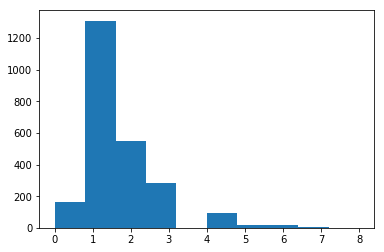

In [13]:
plt.hist(df.bedrooms)

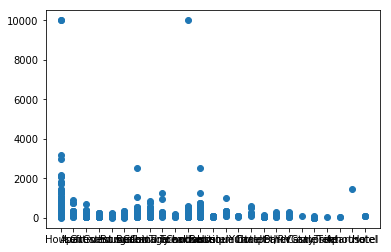

In [14]:
plt.scatter(df.property_type, df.price)

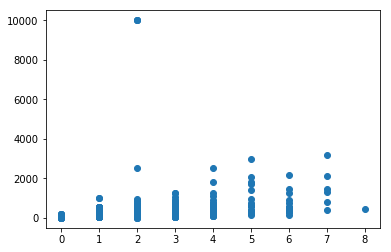

In [15]:
plt.scatter(df.bedrooms, df.price)

In [16]:
df[df.bedrooms == 0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
37,881707,https://www.airbnb.com/rooms/881707,20191128073742,2019-11-28,West A'ville sanctuary in the trees,"Beautiful, inspiring and peaceful.",A peaceful retreat awaits you in the trees jus...,"Beautiful, inspiring and peaceful. A peaceful ...",none,West Asheville is the best! Quiet and neighbor...,"The studio has heat, but no air conditioning. ...",We recommend cars or bikes for getting around....,Your little studio apartment is private. You w...,We will be available to answer any questions y...,This is a smoke free property. Please do not u...,NaN,NaN,https://a0.muscache.com/im/pictures/12731422/a...,NaN,4664726,https://www.airbnb.com/users/show/4664726,Jakub & Maria,2013-01-11,"Asheville, North Carolina, United States","Jakub and I have two children, a boy and a gir...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/4664726/profi...,https://a0.muscache.com/im/users/4664726/profi...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Asheville, NC, United States",NaN,28806,NaN,Asheville,NC,28806.0,North Carolina Mountains,"Asheville, NC",US,United States,35.56893,-82.59475,t,Guest suite,Entire home/apt,2,1.0,0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,95.0,$600.00,"$1,200.00",$100.00,$20.00,1,$0.00,3,1125,1,3,1125,1125,2.9,1125.0,6 days ago,t,4,15,33,284,2019-11-28,524,108,2013-10-05,2019-11-24,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""NORTH CAROLINA"","" BUNCOMBE""}",t,f,strict_14_with_grace_period,f,f,1,1,0,0,7.00
56,1297717,https://www.airbnb.com/rooms/1297717,20191128073742,2019-11-28,"Lovely, peaceful mountain retreat",Cozy Mother-in-law apt with kitchenette and pr...,Room has a queen size bed and a futon that wil...,Cozy Mother-in-law apt with kitchenette and pr...,none,"Quiet, scenic. Dead end street.",Discounts for a week or more.,The nearest bus stop is over a mile away.,NaN,Am usually on premise during your stay and wil...,"No rules, except no loud noises, no smoking an...",NaN,NaN,https://a0.muscache.com/im/pictures/85897234/d...,NaN,614610,https://www.airbnb.com/users/show/614610,Linda,2011-05-22,"Asheville, North Carolina, United States","Enjoy dancing, gardening, reading, playing pia...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/pic

In [17]:
df[df.price == 0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2377,39439187,https://www.airbnb.com/rooms/39439187,20191128073742,2019-11-28,West Asheville Bungalow,The ideal West Asheville Bungalow. Incredible...,"Built in 1930, this house has an incredible ch...",The ideal West Asheville Bungalow. Incredible...,none,Great walking neighborhood. Five restaurants ...,NaN,Three miles to downtown. Uber/Lyft work great...,Feel free to use the Weber charcoal grill. Pl...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/5b106ada-f...,NaN,261458155,https://www.airbnb.com/users/show/261458155,Joann,2019-05-12,US,NaN,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/5fcdd...,https://a0.muscache.com/im/pictures/user/5fcdd...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Asheville, NC, United States",NaN,28806,NaN,Asheville,NC,28806.0,North Carolina Mountains,"Asheville, NC",US,United States,35.57862,-82.58977,t,Bungalow,Entire home/apt,5,1.0,2,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,0.0,NaN,NaN,$0.00,$39.00,1,$0.00,2,30,2,2,1125,1125,2.0,1125.0,today,t,4,27,50,322,2019-11-28,4,4,2019-11-02,2019-11-17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""NORTH CAROLINA"","" BUNCOMBE""}",t,f,flexible,f,f,1,1,0,0,4.0


Maybe this is a mistake? No weekly or monthly price either...

In [18]:
df[df.price == 10000]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
723,16938004,https://www.airbnb.com/rooms/16938004,20191128073742,2019-11-28,Summit Cottage,“Come (Email hidden by Airbnb) e experience Bi...,NaN,“Come (Email hidden by Airbnb) e experience Bi...,none,Mountain,NaN,NaN,NaN,NaN,Below are the House Rules for this home. Upon...,NaN,NaN,https://a0.muscache.com/im/pictures/21b85d38-e...,NaN,96187307,https://www.airbnb.com/users/show/96187307,Steve,2016-09-21,"Asheville, North Carolina, United States",Yonder Luxury Vacation Rentals has designed th...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/dc520...,https://a0.muscache.com/im/pictures/user/dc520...,NaN,138.0,138.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Asheville, NC, United States",NaN,28803,NaN,Asheville,NC,28803.0,North Carolina Mountains,"Asheville, NC",US,United States,35.56154,-82.54096,f,House,Entire home/apt,4,2.0,2,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,10000.0,NaN,NaN,NaN,$175.00,4,$0.00,1,365,30,30,365,365,30.0,365.0,today,t,0,0,0,0,2019-11-28,4,0,2017-07-09,2018-01-01,95.0,10.0,10.0,10.0,10.0,10.0,8.0,f,NaN,"{""NORTH CAROLINA"","" BUNCOMBE""}",t,f,super_strict_60,f,f,28,28,0,0,0.14
1258,23662197,https://www.airbnb.com/rooms/23662197,20191128073742,2019-11-28,Montgord Bungalow,ASHEVILLE! A Perfect 30-day rental for execut...,NaN,ASHEVILLE! A Perfect 30-day rental for execut...,none,Mountain,NaN,NaN,NaN,NaN,Below are the House Rules for this home. Upon...,NaN,NaN,https://a0.muscache.com/im/pictures/64a5a8c9-5...,NaN,96187307,https://www.airbnb.com/users/show/96187307,Steve,2016-09-21,"Asheville, North Carolina, United States",Yonder Luxury Vacation Rentals has designed th...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/dc520...,https://a0.muscache.com/im/pictures/user/dc520...,NaN,138.0,138.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Asheville, NC, United States",NaN,28801,NaN,Asheville,NC,28801.0,North Carolina Mountains,"Asheville, NC",US,United States,35.59847,-82.56699,f,Townhouse,Entire home/apt,4,2.0,2,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,10000.0,NaN,NaN,NaN,$275.00,4,$0.00,1,365,30,30,365,365,30.0,365.0,3 weeks ago,t,0,0,0,0,2019-11-28,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

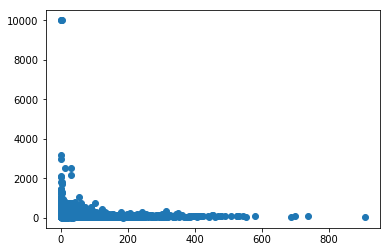

In [19]:
plt.scatter(df.number_of_reviews, df.price)

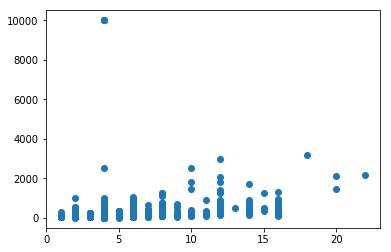

In [20]:
plt.scatter(df.accommodates, df.price)

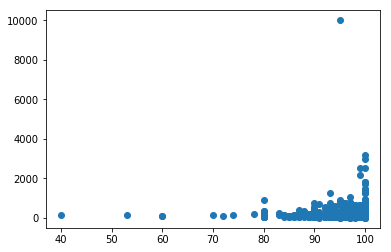

In [21]:
plt.scatter(df.review_scores_rating, df.price)

It seems like the 3 listings at 10,000/night with no reviews is really not exemplary of the rest of the data. What to do here...

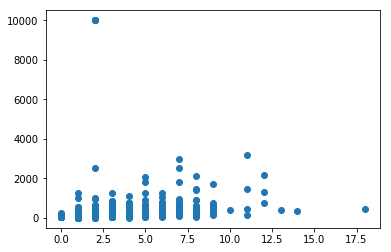

In [22]:
plt.scatter(df.beds, df.price)